In [1]:
from cortexlib.utils.plotting import simclr_colours, neural_colour
import matplotlib.pyplot as plt
from pathlib import Path
import json
import pandas as pd
import numpy as np

paths = [
    Path("../../../analysis/mouse_m01_d2/03_simclr_neural/explained_variance_full_dim.json"),
    Path("../../../analysis/mouse_m01_d2/05_vgg19_neural/explained_variance_full_dim.json"),
    Path("../../../analysis/mouse_m02_d3/03_simclr_neural/explained_variance_full_dim.json"),
    Path("../../../analysis/mouse_m02_d3/05_vgg19_neural/explained_variance_full_dim.json"),
    Path("../../../analysis/mouse_m03_d4/03_simclr_neural/explained_variance_full_dim.json"),
    Path("../../../analysis/mouse_m03_d4/05_vgg19_neural/explained_variance_full_dim.json"),
]

all_data = []
for path in paths:
    with open(path) as f:
        all_data.extend(json.load(f))

records = []
for entry in all_data:
    model = entry["model"]
    layer = entry["layer"]
    mouse_id = entry["mouse_id"]
    for i, cev in enumerate(entry["cumulative_ev"], start=1):
        records.append({
            "model": model,
            "layer": layer,
            "mouse_id": mouse_id,
            "component": i,
            "cev": cev
        })

cev_df = pd.DataFrame(records)
cev_df.head(20)

,model,layer,mouse_id,component,cev
0,simclr,layer1,m01_d2,1,0.023878
1,simclr,layer1,m01_d2,2,0.034249
2,simclr,layer1,m01_d2,3,0.040778
3,simclr,layer1,m01_d2,4,0.046624
4,simclr,layer1,m01_d2,5,0.052285
5,simclr,layer1,m01_d2,6,0.057427
6,simclr,layer1,m01_d2,7,0.062178
7,simclr,layer1,m01_d2,8,0.066706
8,simclr,layer1,m01_d2,9,0.070868
9,simclr,layer1,m01_d2,10,0.074749


In [2]:
# Average across mice
summary = (
    cev_df.groupby(["model", "layer", "component"])
      .agg(mean_cev=("cev", "mean"),
           sem_cev=("cev", lambda x: x.std(ddof=1) / np.sqrt(len(x))))
      .reset_index()
)
summary.head(20)

,model,layer,component,mean_cev,sem_cev
0,simclr,fc,1,0.115345,0.001233
1,simclr,fc,2,0.190728,0.000789
2,simclr,fc,3,0.234854,0.000888
3,simclr,fc,4,0.275791,0.001273
4,simclr,fc,5,0.314614,0.000935
5,simclr,fc,6,0.345204,0.000908
6,simclr,fc,7,0.373269,0.000647
7,simclr,fc,8,0.400103,0.000372
8,simclr,fc,9,0.425853,0.000221
9,simclr,fc,10,0.448984,0.000482


In [3]:
paths = [
    Path("../../../analysis/mouse_m01_d2/03_simclr_neural/neural_explained_variance_full_dim.json"),
    Path("../../../analysis/mouse_m02_d3/03_simclr_neural/neural_explained_variance_full_dim.json"),
    Path("../../../analysis/mouse_m03_d4/03_simclr_neural/neural_explained_variance_full_dim.json"),
]

neural_data = []
for path in paths:
    with open(path) as f:
        neural_data.append(json.load(f))

records = []
for entry in neural_data:
    model = entry["model"]
    layer = entry["layer"]
    mouse_id = entry["mouse_id"]
    for i, cev in enumerate(entry["cumulative_ev"], start=1):
        records.append({
            "model": model,
            "layer": layer,
            "mouse_id": mouse_id,
            "component": i,
            "cev": cev
        })

neural_cev_df = pd.DataFrame(records)
neural_cev_df.head(20)

,model,layer,mouse_id,component,cev
0,neural,neural,m01_d2,1,0.048784
1,neural,neural,m01_d2,2,0.086964
2,neural,neural,m01_d2,3,0.114946
3,neural,neural,m01_d2,4,0.140269
4,neural,neural,m01_d2,5,0.162366
5,neural,neural,m01_d2,6,0.183414
6,neural,neural,m01_d2,7,0.201344
7,neural,neural,m01_d2,8,0.216872
8,neural,neural,m01_d2,9,0.230931
9,neural,neural,m01_d2,10,0.243767


In [4]:
# Average neural across mice
neural_summary = (
    neural_cev_df.groupby("component")
      .agg(mean_cev=("cev", "mean"),
           sem_cev=("cev", lambda x: x.std(ddof=1) / np.sqrt(len(x))))
      .reset_index()
)
neural_summary["model"] = "neural"
neural_summary["layer"] = "neural"

neural_summary.head(20)

,component,mean_cev,sem_cev,model,layer
0,1,0.039061,0.006706,neural,neural
1,2,0.072622,0.011267,neural,neural
2,3,0.094808,0.013805,neural,neural
3,4,0.114177,0.016386,neural,neural
4,5,0.130909,0.018561,neural,neural
5,6,0.147034,0.020606,neural,neural
6,7,0.161365,0.022297,neural,neural
7,8,0.174366,0.023369,neural,neural
8,9,0.186401,0.024272,neural,neural
9,10,0.197778,0.024886,neural,neural


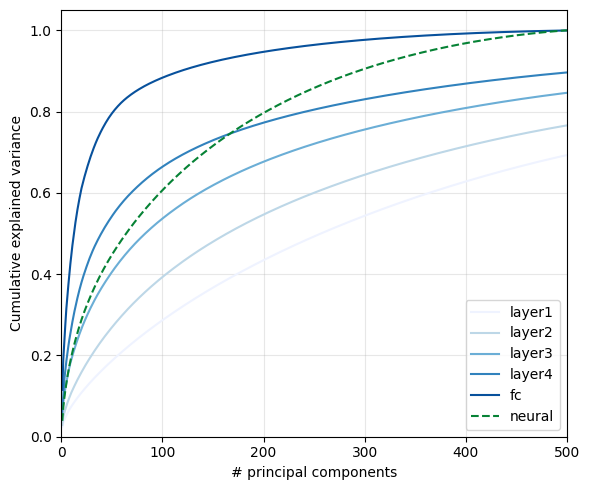

In [6]:
desired_order = ['layer1', 'layer2', 'layer3', 'layer4', 'fc']
smallest_dim = 500

simclr_df = summary[(summary["model"] == "simclr") & (summary["component"] <= smallest_dim)]
neural_df = neural_summary[neural_summary["component"] <= smallest_dim]

plt.figure(figsize=(6, 5))
handles = []
labels = []

for layer in desired_order:
    layer_df = simclr_df[simclr_df["layer"] == layer]
    line, = plt.plot(layer_df["component"], layer_df["mean_cev"], label=layer, color=simclr_colours[layer])
    handles.append(line)
    labels.append(layer)

neural_line, = plt.plot(
    neural_df["component"],
    neural_df["mean_cev"],
    label="neural",
    color=neural_colour,
    linestyle="--"
)
handles.append(neural_line)
labels.append("neural")

plt.legend(handles, labels, loc="lower right")
plt.xlabel("# principal components")
plt.ylabel("Cumulative explained variance")
plt.ylim(0, 1.05)
plt.xlim(0, smallest_dim)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("./figures/simclr_cum_explained_variance_full_dim.svg", format="svg")
plt.show()